## 11.因子分析

In [ ]:
# 数値計算ライブラリ
import numpy as np
import pandas as pd
# 可視化ライブラリ
import matplotlib.pyplot as plt
%matplotlib inline

データを読み込みます

In [ ]:
df = pd.read_csv("Factor_SDGs.csv",encoding = "shift-jis")
df.head()

,ＩＤ,基本的にすべての人に親切にするように心がけている,物事を時間通りに終わらせるようにペースを作るのがかなり得意だ,人と話をするのはとても楽しい,私は心配性ではない,空想にふけって時間を無駄に使うのは嫌だ,他人と競争するよりはむしろ協力したい,私はあまり几帳面ではない,私はあまり陽気ではない,緊張したりびくびくしたりすることが多い,環境に応じて変化する、自分の気分や気持ちには気が付かない,苦手な人に対しては、つい態度に出てしまうことがある,急いでやらなければいけないことがあるのに先延ばしにしてしまうことがある,私は生活のテンポが早い,自分の力ではできないことを、誰か他の人に解決してほしいと思うことがある,私は好奇心が旺盛である,私は情に流されない,自分の目標を達成するためには努力を惜しまない,リーダーになるよりは、我が道を行きたい,悲しくなったり、落ち込んだりすることはない,理論的なことや抽象的な考えにふけって楽しむことがよくある,年齢,都道府県,性別,結婚,職業,業種,世帯年収,居住形態,子供有無,あなたはSDGsについて知っていましたか？,貧困をなくそう,飢餓をゼロに,すべての人に健康と福祉を,質の高い教育をみんなに,ジェンダー平等を実現しよう,安全な水とトイレを世界中に,エネルギーをみんなにそしてクリーンに,働きがいも経済成長も,産業と技術革新の基盤をつくろう,人や国の不平等をなくそう,住み続けられるまちづくりを,つくる責任 つかう責任,気候変動に具体的な対策を,海の豊かさを守ろう,陸の豊かさも守ろう,平和と公平をすべての人に,パートナーシップで目標を達成しよう
0,m899394243,3,3,3,3,3,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,49,大阪府,男性,既婚,会社員(正社員),製造業,"1,200万〜1,500万未満",持ち家（一戸建て）,あり,5,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,m8993988009,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,41,大阪府,男性,未婚,自営業,教育業,700万〜800万未満,持ち家（マンション）,なし,2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,m8998979451,3,2,3,3,3,3,3,3,2,3,3,3,3,3,3,3,3,3,3,3,55,愛知県,男性,既婚,会社員(正社員),情報通信業,700万〜800万未満,賃貸（マンション）,なし,2,3,3,3,3,3,3,2,3,3,3,3,3,3,3,3,3,2
3,m8994655201,4,3,3,4,2,2,3,2,3,2,4,2,3,2,2,2,2,3,2,2,29,千葉県,男性,未婚,自営業,その他,100万未満,賃貸（アパート）,なし,2,3,2,2,4,2,1,3,2,3,2,4,3,4,2,2,3,2
4,m8998462749,3,3,4,4,3,3,3,2,2,3,3,3,3,3,3,3,3,3,3,3,51,神奈川県,男性,既婚,会社員（契約・派遣社員）,不動産業,500万〜600万未満,持ち家（一戸建て）,あり,5,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,2,2


In [ ]:
df2 = df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]

In [ ]:
df=df2
df.head()

,基本的にすべての人に親切にするように心がけている,物事を時間通りに終わらせるようにペースを作るのがかなり得意だ,人と話をするのはとても楽しい,私は心配性ではない,空想にふけって時間を無駄に使うのは嫌だ,他人と競争するよりはむしろ協力したい,私はあまり几帳面ではない,私はあまり陽気ではない,緊張したりびくびくしたりすることが多い,環境に応じて変化する、自分の気分や気持ちには気が付かない,苦手な人に対しては、つい態度に出てしまうことがある,急いでやらなければいけないことがあるのに先延ばしにしてしまうことがある,私は生活のテンポが早い,自分の力ではできないことを、誰か他の人に解決してほしいと思うことがある,私は好奇心が旺盛である,私は情に流されない,自分の目標を達成するためには努力を惜しまない,リーダーになるよりは、我が道を行きたい,悲しくなったり、落ち込んだりすることはない,理論的なことや抽象的な考えにふけって楽しむことがよくある
0,3,3,3,3,3,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3
1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,3,2,3,3,3,3,3,3,2,3,3,3,3,3,3,3,3,3,3,3
3,4,3,3,4,2,2,3,2,3,2,4,2,3,2,2,2,2,3,2,2
4,3,3,4,4,3,3,3,2,2,3,3,3,3,3,3,3,3,3,3,3


#### データの用意

In [ ]:
# データの標準化
# sklearnの標準化モジュールをインポート
from sklearn.preprocessing import StandardScaler

# データを変換する計算式を生成
sc = StandardScaler()
sc.fit(df)

# 実際にデータを変換
z = sc.transform(df)

#### 因子数の推定

In [ ]:
# sklearnのPCA(主成分分析)クラスをインポート
from sklearn.decomposition import PCA

# 主成分分析のモデルを生成
pca = PCA() # インスタンスを生成･定義
pca.fit(z)  # 標準化得点データにもとづいてモデルを生成

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# 寄与率の取得
evr = pca.explained_variance_ratio_
pd.DataFrame(evr, 
             index=["PC{}".format(x + 1) for x in range(len(df.columns))], 
             columns=["寄与率"])

,寄与率
PC1,0.257397
PC2,0.177229
PC3,0.085597
PC4,0.068869
PC5,0.050938
PC6,0.042132
PC7,0.039048
PC8,0.033670
PC9,0.031793
PC10,0.028822


スクリープロット　（それぞれの因子（PC1~PC20）が、観測変数の分散を、それぞれどのくらい説明するのか（固有値））

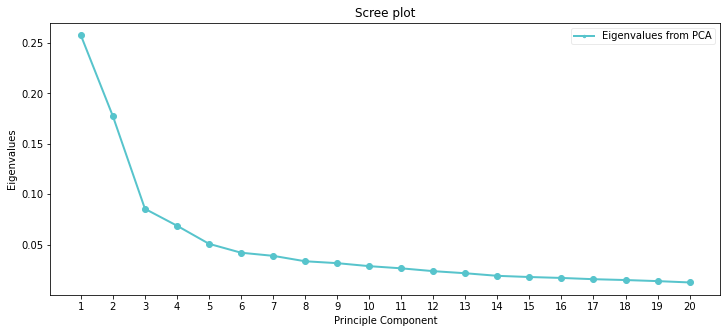

In [ ]:
#　図の枠組みを作る
fig = plt.figure(figsize=(12,5))

plt.plot(["{}".format(x + 1) for x in range(len(df.columns))], evr, 'ro-', linewidth=2, color="#57C4CC")

# 図のタイトル
plt.title('Scree plot')

# 図のx軸、y軸ラベル
plt.xlabel('Principle Component')
plt.ylabel('Eigenvalues')

# レジェンドを追加
leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3, 
                 shadow=False,
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
plt.show()

#### 因子分析

In [ ]:
# sklearnのFactorAnalysis(因子分析)クラスをインポート
from sklearn.decomposition import FactorAnalysis as FA

# 因子数を指定
n_components=5

# 因子分析の実行
fa = FA(n_components, max_iter=5000) # モデルを定義
fitted = fa.fit_transform(z) # fitとtransformを一括処理

print(fitted)
print(fitted.shape)

[[ 0.10900651  0.46127867  0.35506488 -0.02764302 -0.58579098]
 [ 3.55142104 -2.4118441   0.11498021 -0.27775706 -0.06780467]
 [ 0.14018723  0.04857657  0.37928002 -0.55123965 -0.16858431]
 ...
 [-0.20502502  0.20893528  0.46789057  0.01755921 -0.44376035]
 [ 0.26410266 -1.25225072 -0.16017214  0.15735426 -0.98829475]
 [-0.39947601 -1.65290582 -0.97952334 -1.38443944  2.00215084]]
(300, 5)


In [ ]:
# 因子の解釈
# 変数Factor_loading_matrixに格納
Factor_loading_matrix = fa.components_.T

# データフレームに変換
pd.DataFrame(Factor_loading_matrix, 
             columns=["第1因子", "第2因子", "第3因子", "第4因子", "第5因子"], 
             index=[df.columns])

,第1因子,第2因子,第3因子,第4因子,第5因子
基本的にすべての人に親切にするように心がけている,0.718066,0.149461,0.241265,-0.191340,0.171236
物事を時間通りに終わらせるようにペースを作るのがかなり得意だ,0.689132,0.043608,0.104906,0.224001,0.076842
人と話をするのはとても楽しい,0.711260,0.263374,0.092267,-0.165294,0.000674
私は心配性ではない,0.488267,0.253155,-0.521742,-0.229030,-0.002067
空想にふけって時間を無駄に使うのは嫌だ,0.490732,-0.021255,-0.363200,0.172385,0.331543
他人と競争するよりはむしろ協力したい,0.603876,-0.123379,0.329235,-0.287178,0.208246
私はあまり几帳面ではない,0.156250,-0.507679,-0.243882,-0.365314,0.048576
私はあまり陽気ではない,-0.048337,-0.744868,-0.072710,0.150853,0.159959
緊張したりびくびくしたりすることが多い,0.019585,-0.672781,0.218097,0.173390,0.114075
環境に応じて変化する、自分の気分や気持ちには気が付かない,0.264279,-0.582337,-0.141575,0.115772,0.126491


In [ ]:
fitted

array([[ 0.10900651,  0.46127867,  0.35506488, -0.02764302, -0.58579098],
       [ 3.55142104, -2.4118441 ,  0.11498021, -0.27775706, -0.06780467],
       [ 0.14018723,  0.04857657,  0.37928002, -0.55123965, -0.16858431],
       ...,
       [-0.20502502,  0.20893528,  0.46789057,  0.01755921, -0.44376035],
       [ 0.26410266, -1.25225072, -0.16017214,  0.15735426, -0.98829475],
       [-0.39947601, -1.65290582, -0.97952334, -1.38443944,  2.00215084]])

In [ ]:
# big five 理論の５要素：
factors = ['外向性', '調和性', '誠実性', '神経症的傾向', '経験への開放性']

#　第一因子：　外交的、競争、好奇心、努力家、楽天的
#　第二因子：　几帳面、陽気、物怖じしない、誰とでも仲良く、先延ばししない、我が道行かない　（調和性＋誠実性）
#　第三因子: 心配性
#　第四因子：　親切でない、先延ばししない、常に流される
#　第五因子：　好奇心がない、空想ふけたくない

散布図行列

In [ ]:
df_sdgs = df.iloc[:,30:]
#df_sdgs_renamed = df_sdgs.rename(index={0:SDG1, 1:})
df_fa = pd.DataFrame(fitted, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df_scatter_plot_matrix = pd.concat([df_fa, df_sdgs], axis=1)
df_scatter_plot_matrix

,PC1,PC2,PC3,PC4,PC5
0,0.109007,0.461279,0.355065,-0.027643,-0.585791
1,3.551421,-2.411844,0.114980,-0.277757,-0.067805
2,0.140187,0.048577,0.379280,-0.551240,-0.168584
3,-0.327737,0.635960,0.729178,-0.763192,0.236715
4,0.527326,0.453055,0.212840,-0.803584,-0.266498
...,...,...,...,...,...
295,0.277047,-0.131212,0.567414,-0.270045,0.028074
296,1.736839,2.252896,1.296671,0.536227,0.413965
297,-0.205025,0.208935,0.467891,0.017559,-0.443760
298,0.264103,-1.252251,-0.160172,0.157354,-0.988295


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2267c09110>,
      dtype=object)

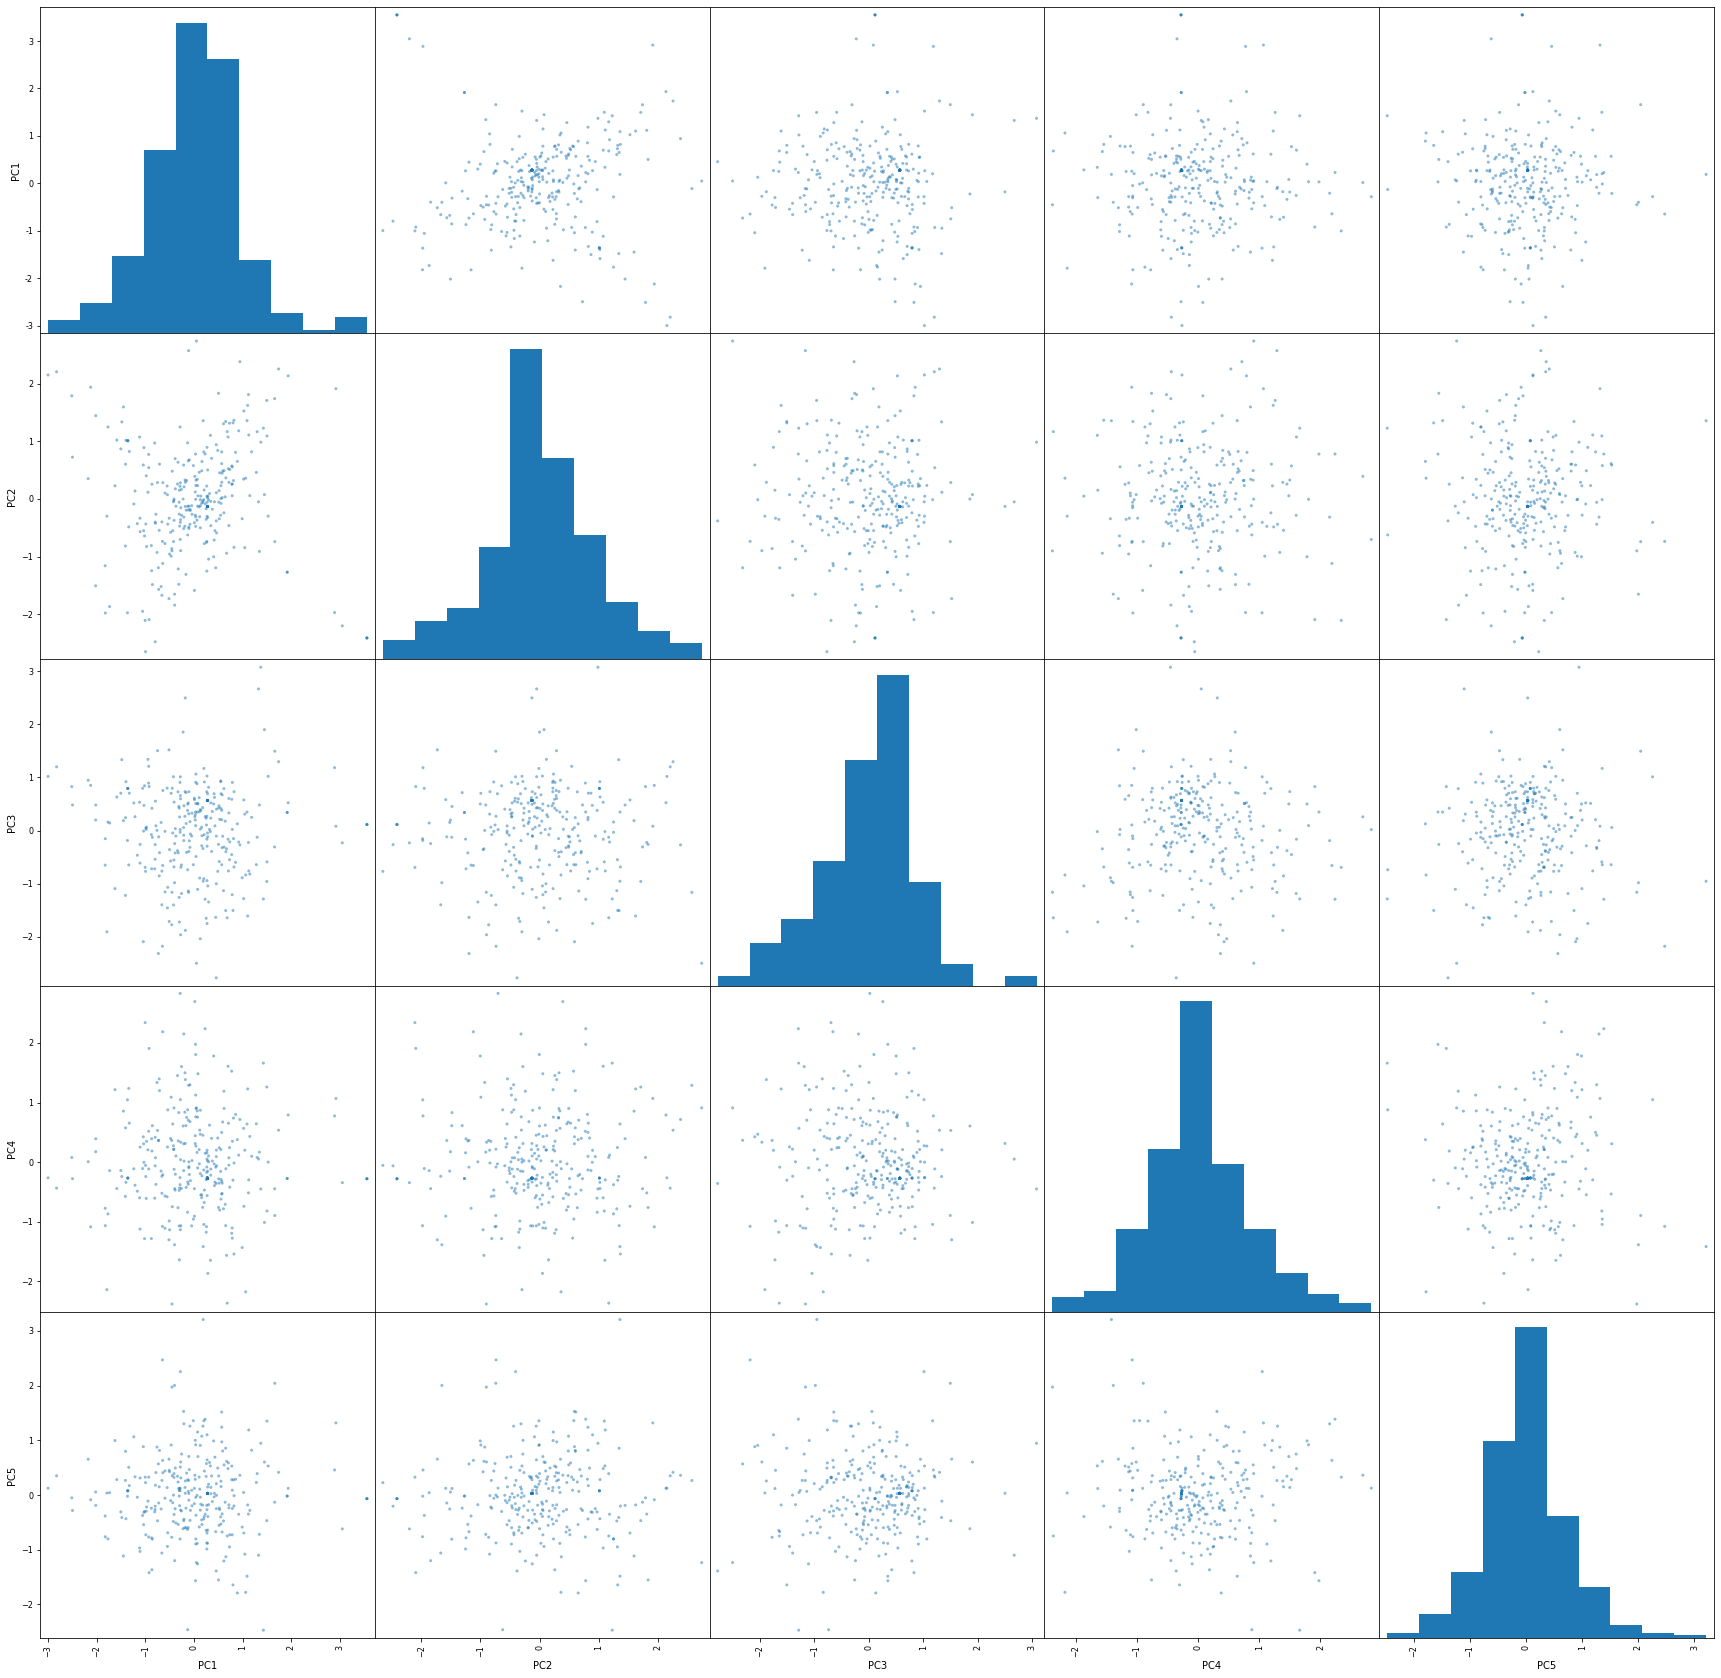

In [ ]:
pd.plotting.scatter_matrix(df_scatter_plot_matrix, figsize=(30,30))